In [1]:
import tangram as tg
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import anndata as ad

/home/yfy6677/miniconda3/envs/tangram-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
expression_data = pd.read_csv("/projects/b1042/YiLab/Cady/Code_3rdDraft/Mouse Kidney/expressionST.txt", delimiter='\t', index_col=0)

# Replace 'spatial_data.txt' with the path to your spatial coordinates
# and specify the correct delimiter
spatial_data = pd.read_csv("/projects/b1042/YiLab/Cady/Code_3rdDraft/Mouse Kidney/coordinateST.txt", delimiter='\t', index_col=0)

In [3]:
expression_data

,AAACCGTTCGTCCAGG-1,AAACCTAAGCAGCCGG-1,AAACGAGACGGTTGAT-1,AAACGGTTGCGAACTG-1,AAACTCGGTTCGCAAT-1,AAACTGCTGGCTCCAA-1,AAAGGCTACGGACCAT-1,AAAGGCTCTCGCGCCG-1,AAAGGGATGTAGCAAG-1,AAAGTGTGATTTATCT-1,...,TTGTAATCCGTACTCG-1,TTGTCGTTCAGTTACC-1,TTGTGAACCTAATCCG-1,TTGTGCAGCCACGTCA-1,TTGTGGTAGGAGGGAT-1,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTCAGTGTGCTAC-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1
GENES,,,,,,,,,,,,,,,,,,,,,
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm19938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC124606.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC133095.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC133095.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
spatial_data

,row,col
SpotID,,
AAACCGTTCGTCCAGG-1,7307,4116
AAACCTAAGCAGCCGG-1,8873,6932
AAACGAGACGGTTGAT-1,5280,6669
AAACGGTTGCGAACTG-1,9107,5279
AAACTCGGTTCGCAAT-1,8990,6037
...,...,...
TTGTGTATGCCACCAA-1,7790,5353
TTGTGTTTCCCGAAAG-1,7191,5286
TTGTTCAGTGTGCTAC-1,3960,5642


In [5]:
adata = ad.AnnData(X=expression_data.values.T)
adata.obsm['spatial'] = spatial_data.values 
adata.var['features'] = expression_data.index.tolist()

In [6]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)


<Axes: xlabel='n_genes_by_counts'>

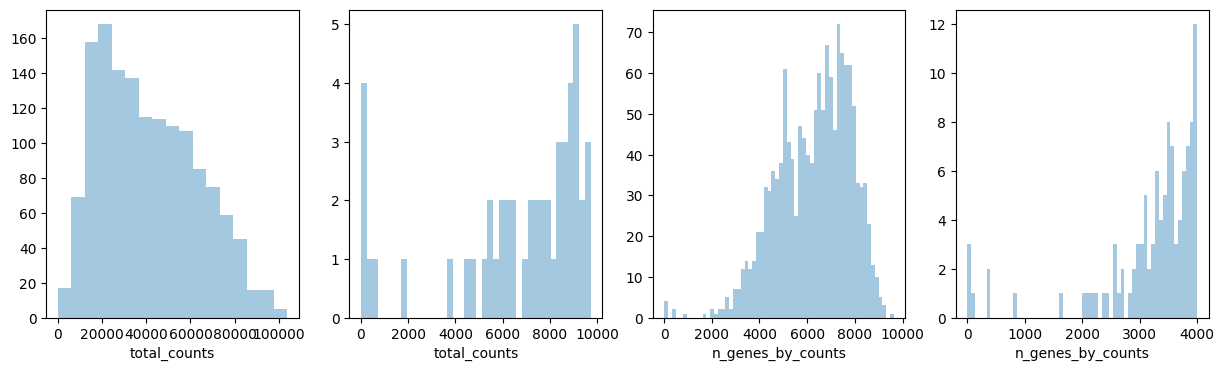

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [8]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [9]:
ad_sc_mat=pd.read_csv("/projects/b1042/YiLab/Cady/Code_3rdDraft/Mouse Kidney/expressionSC.txt", delimiter='\t', index_col=0)
ad_sc = ad.AnnData(X=ad_sc_mat.values.T)
ad_sc.var['features'] = ad_sc_mat.index.tolist()

ad_sc.var_names_make_unique()
ad_sc.var["mt"] = ad_sc.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(ad_sc, qc_vars=["mt"], inplace=True)
sc.pp.normalize_total(ad_sc, inplace=True)
sc.pp.log1p(ad_sc)
sc.pp.highly_variable_genes(ad_sc, flavor="seurat", n_top_genes=2000)

In [10]:
tg.pp_adatas(ad_sc, adata, genes=None)

INFO:root:10148 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:10148 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [11]:
ad_map = tg.map_cells_to_space(ad_sc, adata)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 10148 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.402, KL reg: 0.007
Score: 0.569, KL reg: 0.000
Score: 0.572, KL reg: 0.000
Score: 0.573, KL reg: 0.000
Score: 0.574, KL reg: 0.000
Score: 0.574, KL reg: 0.000
Score: 0.574, KL reg: 0.000
Score: 0.574, KL reg: 0.000
Score: 0.574, KL reg: 0.000
Score: 0.575, KL reg: 0.000


INFO:root:Saving results..


In [12]:
ad_map.X.shape

(5060, 1438)

In [13]:
np.savetxt("/projects/b1042/YiLab/Cady/Code_3rdDraft/Mouse Kidney//Tangram.rslt_new.txt",ad_map.X,delimiter=",")

In [14]:
ad_map.write("/projects/b1042/YiLab/Cady/Code_3rdDraft/Mouse Kidney/ad_map.h5ad")